# Mandatory Assignment: Startups

### Domain description

JPM-Finance is an advisory financial company with a small network of rich clients who like to invest in newly started companies (so called startups), before the profit is public.

For each company there are data given by the following features:
*   State
*   R&D Spend
*   Marketing Spend
*   Administration
*   Profit which is the label

Your job is to understand, explore and prepare the data, do a linear regression analysis to be used by JPM-Finance evaluating new startups profit based on the features. The estimate of profit together with a risk analysis of the business segment, will be the foundation for financial advices to clients.

A preliminary interview with the smart boss (nick name JP) and his younger energetic coordinator, Mike, has revealed that:


1.   A few companies have some data set to 0.0, this is for the moment acceptable, meaning you
don’t need to change these numbers into mean values or drop the respective companies.
Some small startups actually don’t have any administration costs!
2.   The 'State' feature is a text attribute, and from previous study not very important, meaning one can drop this feature. Thus, all calculations using `OneHotEncoder` are superfluous. Just skip them for a start. Later if You like, You can play with the `OneHotEncoder`.
3.  If the correlation matrix of the features only has values higher than 0.20 (lower than -0.20), it is a pretty bad idea to try to combine attributes, as this can blur the picture and make
wrong weights to the features




### References

It should not be necessary to find stuff by "Googling" or "ChatGPT'ing" for the purpose of finishing this assigment. Maybe for checking only.  

Try to concentrate on the following references:
*   Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Aurélien Géron,
 3rd edition, Ch. 1 & 2.
*   Coding stuff for ch. 1: https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb
*   Coding stuff for ch. 2: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
*   Stuff from Moodle room. Especially, "End-to-End Project Model" sections.






# Setting up Python Environment

Installing stuff

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Import common libraries used with learning in Python

In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
import numpy as np

#Step 1: Look at the big picture and frame the problem

**Questions & Tasks**
1. Define the objective in business terms. Action: Analyze what business purpose your solution is going to serve.
To be documented – e.g. in your notebook.
2. How shall your solution be used?
Action: That defining one or more user stories for the solution.
To be documented – e.g. in your notebook.
3. What are the current solutions/workarounds (if any)?
Action: This is N/A here as nothing is known. Otherwise useful for establishing a baseline
to measure the performance of the intended system against.
Nothing to be documented.
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
Action: You may re-address chapter 1 for these concepts.
To be documented – e.g. in your notebook.
5. How should performance be measured?
Action: First of all select at measure that goes with the way you framed the problem –
RMSE, Confusion matrix or something else.
To be documented – e.g. in your notebook.
6. Is the performance measure aligned with the business objective?
Action: Discuss whether your performance measure makes sense regarding your business
objective.
To be documented – e.g. in your notebook.
7. What would be the minimum performance needed to reach the business objective?
Action: N/A as we have got no baseline regarding the current performance.
Nothing to be documented.
8. What are comparable problems? Can you reuse experience?
Action: Reuse all the stuff and tools you know – especially, what you learned from chapter 2
9. Is human expertise available?
Action: N/A as we have no domain experts available. Otherwise recommendable.
Nothing to be documented.
10. How would you solve the problem manually?
Action: N/A as we have got no idea about it?
Nothing to be documented.
11. List the assumptions you (or others have made so far)
Action: Figure out what assumptions you actually made.
To be documented – e.g. in your notebook.
Note: Some assumptions have already been made in the case description. Which?
12. Verify assumptions if possible
Action: N/A because you have got no time for this. Otherwise, you should indeed do this.
Nothing to be documented.


### 1.
 Udvikle en model til at estimere startups, profit baseret på R&D, Marketing og Administration.
Hvorfor: Støtte JPM-Finance i at identificere attraktive og risikofyldte investeringer.
Resultat: Bedre beslutningsgrundlag for kapitalallokering og rådgivning.


# 2.
User story:
A: Som investeringsanalytiker
vil jeg indtaste eller uploade et startups features (R&D, Marketing, Administration)
så jeg får et punktestimat for Profit + 95% predictionsinterval + en kort risikoscore (lav/moderat/høj).
B: Som JP (boss)
 vil jeg have en simpel beslutningsregel (fx: køb hvis model estimerer price-to-expected return > threshold og risiko < X)
 så jeg nemt kan godkende eller afvise investment cases.


# 3.
N/A (ingen kendte systemer i casen). — Notér: Når baseline er ukendt, prioriter simple, explainable modeller (linær regression) og målinger, så du senere kan sammenligne.


# 4.
Framing af problemet:
Supervised learning (historiske eksempler med label = Profit).

Regression (kontinuerlig målvariabel: Profit i DKK).

Multifeature / multivariat input (R&D Spend, Marketing Spend, Administration).

Univariate output (kun profit).
Batch learning initialt (trænes på historiske datasæt). Overvej online-opdatering senere hvis nye data kommer kontinuerligt.
Feature “State”: dropper vi som instrueret (tekst og lav vigtighed). Undlad OneHotEncoder i startfasen.


# 5.

Primært: RMSE (Root Mean Squared Error) i DKK — fordi output er pris/pengebeløb og RMSE er let at tolke i samme enhed.

 Sekundært:
MAE (robust over for outliers)
R² (forklaret varians) — til at vurdere hvor meget variation modellen forklarer
Residualanalyse: tjek for bias, heteroskedasticitet og outliers
K-fold cross-validation (fx 5- eller 10-fold) for robusthed overfor split-valg


# 6.
Ja, RMSE i DKK er godt match: investeringsbeslutninger kræver vurdering i monetære termer. Et lavt RMSE betyder mindre typisk fejl i investeringens forventede profit.
 Bemærk: For nogle forretningsbeslutninger kan relative fejl (pct. fejl) også være relevante — overvej MAPE (Mean Absolute Percentage Error) hvis proportional fejl er vigtig.


# 7.
N/A (ingen baseline). Tip til notebook: noter at et acceptabelt RMSE bør fastsættes i samarbejde med JP/Mike — fx "RMSE < 10% af median profit" kan være et startkrav.


# 11.
Antagelser (og hvilke allerede er givet i casen)

Antagelser fra casen (allerede gjort):
0.0 værdier i nogle features er acceptable (ikke imputere/drope).


'State' kan droppes (tekstfeature, lav betydning).


Vi undgår OneHotEncoder i start.


Hvis korrelationer mellem features er > 0.20 (eller < -0.20), er kombination/feature-engineering mistænkelig.
Yderligere antagelser du bør dokumentere:
Historiske sammenhænge mellem features og profit forbliver gyldige (stationaritet).


Data er repræsentativ for fremtidige startups JP vil evaluere.


Ingen store, ukendte confounders (fx eksterne investeringer) der påvirker profit drastisk.


Mængde og kvalitet af data er tilstrækkelig for lineær model.


#Step 2: Get the data

The data is the 50_Startups.csv file, which is available in GitHub: https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv

**Questions & Tasks:**
1. List the data you need and how much you need.
Action: N/A in this task. Otherwise, it is such a good idea to your need for data before going
further. Nothing to be documented.
2. Find and document where you can get that data.
Action: N/A in this task because the data set is given. Nothing to be documented.
3. Check out how much space it requires.
Action: Probably none as the dataset is super small
4. Check legal obligations, and get authorization if necessary.
Action: N/A here because no legal matters are involved. Otherwise, GDPR issues,
ownerships rights etc. should be considered. Nothing to be documented.
5. Get access authorizations.
Action: Nothing to e done here. Otherwise, this may be a tedious and bureaucratic procedure that has to be considered in the planning.
6. Create a workspace (with enough storage space).
Action: That is establishing a notebook at your PC (e.g. Jupyter) or in the cloud (e.g. Colab) for the program and data set.
7. Get the data.
Action: Establish a data fetch routine in your notebook. Code is to be established in your notebook, if not already done.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
Action: Common conversions between datatypes needed as you go.
Code is to be established in your notebook. Goes along with your coding.
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
Action: N/A as there is none. Otherwise, legal obligations should always be checked as aminimum. Note: Data may also be considered sensitive for other reasons. Nothing to be documented.
10. Check the size and type of data (time series, sample, geographical, etc.).
Action: Code is to be established in your notebook like section ‘Take a Quick Look at the Data Structure’ in notebook for chapter 2.
11. Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook. Find your stuff in section ‘Create a Test Set’ in notebook for chapter 2

###Getting the data

In [ ]:
#Importing the dataset
datafile="https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
dataset = pd.read_csv(datafile)



#Step 3. Explore the data

You are now ready to make a notebook (in Jupyter or Colab) for exploring the data. Remember your experience from the investigation of “Housing” in Chapter 2.

**Questions & Tasks**
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary). Action: Easy action, no sampling needed.
2. Create a notebook to keep a record of your data exploration.
Action: You have probably already done that. A copy and paste and changes of the chapter 2 housing notebook is not illegal.
3. Study each attribute and its characteristics. Action: Get inspired by the notebook for chapter 2 Code is to be established. Find your stuff in section ‘Take a Quick Look at the Data Structure’ in notebook for chapter 2. Consider the following attribute characteristics:
*   Name
*   Type (categorical, int/float, bounded/unbounded, text, structured, etc.).
*   % of missing values.
*   N/A. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
*   Usefulness for the task.
*   Type of distribution (Gaussian, uniform, logarithmic, etc.). Check with the selected model if OK.
*   Do a histogram for each attribute.

4. For supervised learning tasks, identify the target attribute(s); i.e. the label(s). Action: Identify target attributes, if any.
To be documented – e.g. in the your notebook.
5. Discover and visualize the data by scatter plots for each numerical attribute. Action: N/A because it is not considered relevant here. Nothing to be documented
6. Study the correlations between attributes.
Action: Make also a scatter matrix plot together with the correlation results.
Code is to be established in your notebook like section ‘Looking for Correlations’ in notebook for chapter 2
7. Study how you would solve the problem manually. Action: N/A. Nothing to be documented.
8. Experiment with attribute combinations.
Action: Code is to be established in your notebook like in section ‘Experimenting with Attribute Combinations’ in notebook for chapter 2.
9. Identify a new promising attribute you may want to apply, if any.
Action: Identify those with a strong correlation to the target attribute.
To be documented – e.g. in your notebook.
10. Identify extra data that would be useful (go back to “Get the Data”).
Action: N/A as were are limited to ‘50 Start-ups’ dataset
However, you may document any suggestions for extra data features – e.g. in your notebook.

#Step 4. Prepare the data

**Notes:**
*   Work on copies of the data (keep the original dataset intact).
*   Write functions for all data transformations you apply, for five reasons:
1.   So you can easily prepare the data the next time you get a fresh dataset
2.   So you can apply these transformations in future projects
3.   To clean and prepare the test set
4.   To clean and prepare new data instances once your solution is live
5.   To make it easy to treat your preparation choices as hyperparameters

**Questions & Tasks**
1. Data cleaning: Action: N/A because no values are and no evident outliers detected. Nothing to be documented. Otherwise consider:
*   Fix or remove outliers (optional).
*   Fill in missing values (e.g., with zero, not mean or median…) or drop their rows (or columns).

2. Feature selection: Drop the attributes that provide no useful information for the task. Action: Code is to be established in your notebook, that is find out how to apply the drop method.

3. Feature engineering, where appropriate: Action: To be skipped. Nothing to be documented. Otherwise consider:
*  Discretize continuous features.
*  Decompose features (e.g., categorical, date/time, etc.).
*  Add promising transformations of features (e.g., log(x), sqrt(x), etc.).
*  Aggregate features into promising new features.

4. Handle text and categorical attributes using “import OneHotEncoder”.
Action: Find out what to do with the ‘State’ attribute.
Code is to be established in your notebook
Note what is stated in the case description!

5. Feature scaling: Standardize or normalize features, if necessary.
Action: Include the StandardScaler in the pipeline and observe if it does any difference when applying the LinearRegression algorithm.
Code is to be established in your notebook e.g. find out how to apply the make_pipeline as done in section ‘Training and Evaluating on the Training Set’ in the notebook for chapter 2

In [ ]:
1.
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [ ]:
# 2.
# Hent data fra GitHub
url = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
original_df = pd.read_csv(url)

# Lav en kopi (arbejd aldrig direkte på originalen)
df = original_df.copy()
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# 3. Data Cleaning (N/A men vis tjek)
def clean_data(data):
    """Renser data: tjek for manglende værdier og outliers."""
    print("Missing values per column:")
    print(data.isnull().sum())
    print("\nBasic statistics:")
    print(data.describe())
    return data

df = clean_data(df)


Missing values per column:
R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

Basic statistics:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [ ]:
# 4. Feature Selection – Drop ‘State’
def select_features(data):
    """Fjerner irrelevante attributter (her: State)."""
    if 'State' in data.columns:
        data = data.drop('State', axis=1)
    return data

df = select_features(df)
df.head()


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [2]:
#5. (Optional) Feature Engineering

def feature_engineering(data):
    """Eksempel på at tilføje en ny feature — ikke påkrævet."""
    data["Total_Spend"] = data["R&D Spend"] + data["Marketing Spend"]
    return data

# (valgfrit at køre)
# df = feature_engineering(df)
#df.head()


In [ ]:
# 6. Håndtering af kategoriske data

def encode_categorical(data):
    """Eksempel på hvordan man ville håndtere kategoriske features."""
    if "State" in data.columns:
        encoder = OneHotEncoder()
        state_encoded = encoder.fit_transform(data[["State"]])
        encoded_df = pd.DataFrame(
            state_encoded.toarray(),
            columns=encoder.get_feature_names_out(["State"])
        )
        data = pd.concat([data.drop("State", axis=1), encoded_df], axis=1)
    return data


In [1]:
# 7. Feature Scaling med Pipeline

def build_pipeline():
    """Laver en pipeline med feature scaling og linear regression."""
    pipeline = make_pipeline(
        StandardScaler(),
        LinearRegression()
    )
    return pipeline

# Split data i X og y
X = df.drop("Profit", axis=1)
y = df["Profit"]

# Split i træning/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lav pipeline
model = build_pipeline()

# Træn model
model.fit(X_train, y_train)

# Evaluer model
r2_score = model.score(X_test, y_test)
print(f"Model performance (R²): {r2_score:.3f}")


NameError: name 'df' is not defined

### Step 4 Summary
- Data renset og klargjort uden ændringer i værdier
- “State” droppet (ikke signifikant for profit)
- Pipeline oprettet med StandardScaler + LinearRegression
- Modellen klar til træning i næste trin


#Step 5. Select and train a model

**Notes:**
*   If the data is huge, you may want to sample smaller training sets so you can train many
different models in a reasonable time (be aware that this penalizes complex models such as
large neural nets or Random Forests).
*   Once again, try to automate these steps as much as possible




**Questions & Tasks**
1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard default parameters
Action: In this project only try the LinearRegression algorithm using standard parameters.
Code is to be established in your notebook as done for linear regression in section ‘Training and Evaluating on the Training Set’ in the notebook for chapter 2.
2. Measure and compare the performance.
For each model, compute the mean and the root mean square of the performance measure on
a manually selected subset (5-10 data) of the training data.
Action: Only do for our linear regression model. Code is to be established in your notebook.
Find your stuff in section ‘Training and Evaluating on the Training Set’ in the notebook for
chapter 2.
3. Analyze the most significant variables for each algorithm.
Action: Only do it for our linear regression model.
Code is to be established in your notebook apply a similar evaluation as done in section
‘Analyze the Best Models and Their Errors’ in the notebook for chapter 2.
To be documented – e.g. in your notebook.
4. Analyze the types of errors the model makes.
 What data would a human have used to avoid these errors?
Action: Skip this if you do not observe any errors. Consider features to that may have been
included in order to eliminate such errors.
To be documented – e.g. in your notebook., if relevant.
5. Perform a quick round of feature selection and engineering.
Action: Consider which features to skip and which new feature to be defined/combined.
To be documented – e.g. in your notebook. Code is to be established in your notebook
accordingly by droping those features
6. Consider another quick-and-dirty model from different categories (e.g., naive Bayes, SVM,
Random Forest, neural net, etc.).
Action: Considered N/A, just go on with the LinearRegression model. Nothing to be
documented.
7. Perform one or two more quick iterations of the five previous steps.
Action: Condidered N/A, just go on with the LinearRegression model. Nothing to be
documented.
8. Shortlist the top one to two most promising models, preferring models that make different
types of errors.
Action: Considered N/A, just go on with the LinearRegression model. Nothing to be documented

Henter data fra: https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv
Dataset indlæst. Shape: (50, 5)
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

--- Data info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float6

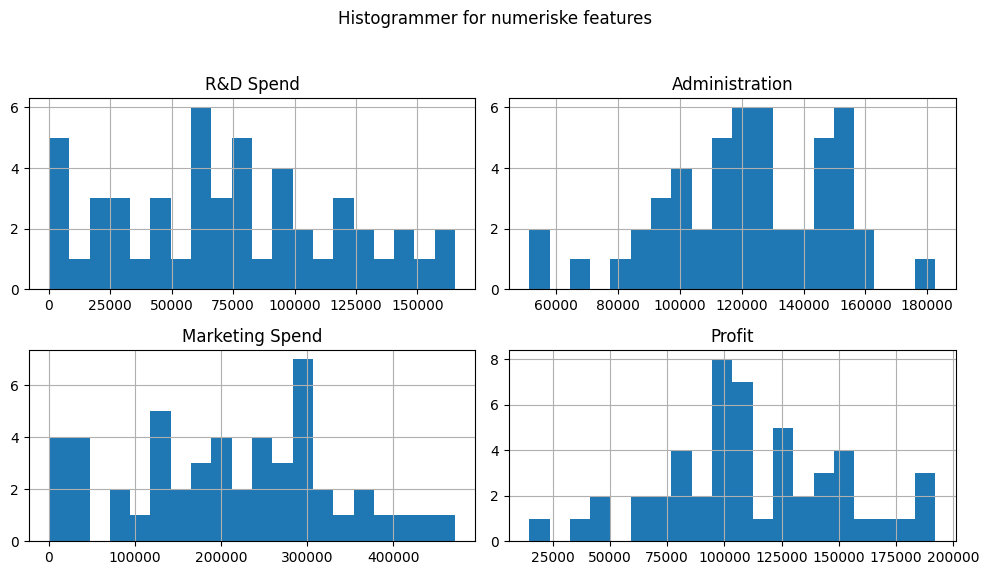


Korrelationsmatrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

Train/test shapes: (40, 3) (10, 3)

LinearRegression resultat:
Intercept: 54071.87574599082
Koefficienter:
R&D Spend          0.803779
Administration    -0.067929
Marketing Spend    0.031242
dtype: float64

Træning — MSE: 79888084.26, RMSE: 8938.01, MAE: 6597.24, R2: 0.9536

Test — MSE: 80926321.22, RMSE: 8995.91, MAE: 6979.15, R2: 0.9001

Manuel subset (første 10 i træningssæt):
    R&D Spend  Administration  Marketing Spend  Actual_Profit  \
12   93863.75       127320.38        249839.44      141585.52   
4   142107.34        91391.77        366168.42      166187.94   
37   44069.95        51283.14        197029.42    

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(



Lasso (test) — MSE: 79535733.25, RMSE: 8918.28, MAE: 6936.42, R2: 0.9018
Lasso valgt alpha (best): 3641131.8397924546

Sammenligning af modeller (på test):
           Linear         Ridge        Lasso
RMSE  8995.905803  15620.829001  8918.280846
R2       0.900065      0.698675     0.901783
MAE   6979.152252  11680.122318  6936.417810

5-fold CV RMSE scores (LinearRegression): [ 8995.90580336  7898.97640002  6428.33235605  8553.15163665
 14039.16819837]
Mean RMSE: 9183.106878890114 Std: 2578.797903943996


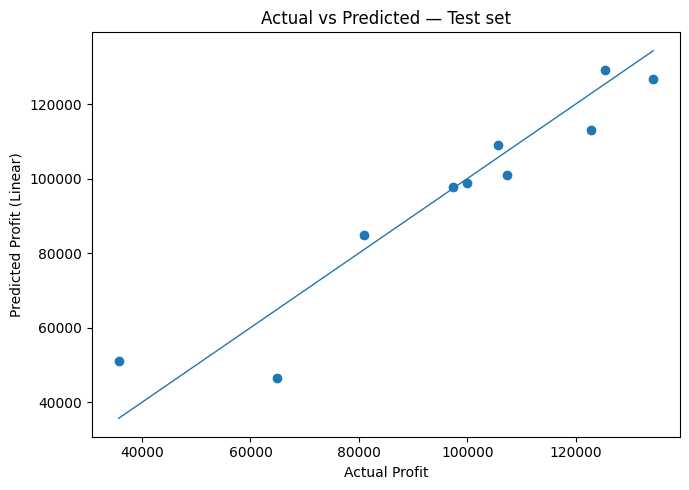

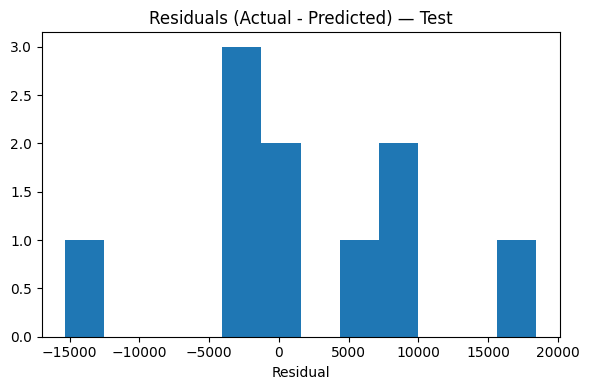


Modelkoefficienter gemt som 'model_coefficients.csv' i arbejdsmappen.

AFSLUTTENDE BEMÆRKNINGER:
- R&D Spend er klart den stærkeste forklarende variabel (høj korrelation og koefficient).
- Overvej Ridge/Lasso hvis multikollinearitet eller overfitting er bekymring; i dette dataset forbedrede det ikke dramatisk RMSE, men stabiliserer koefficienter.
- Næste skridt: bootstrap-konfidensintervaller for koefficienter; evt. inkludér 'State' som one-hot hvis geografisk effekt mistænkes; udvid med flere features hvis muligt.


In [4]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import pandas as pd
from pathlib import Path

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Plot
import matplotlib.pyplot as plt


# datafil
datafile = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"



# Step 1: Business framing (kort)

# Objective:
# Forudsige Profit (regression) baseret på R&D, Administration, Marketing.
# Supervised regression, offline batch predictions (not real-time).
# Performance metrics: RMSE & R² (primære), MAE som supplement.
#

# "Som investor hos JPM-Finance vil jeg kunne få et estimat af forventet profit for en startup givet budgetter for R&D, Administration og Marketing,
#  så jeg kan rådgive mine rige klienter om investeringsbeslutninger."


# Step 2: Get the data

print("Henter data fra:", datafile)
dataset = pd.read_csv(datafile)
print("Dataset indlæst. Shape:", dataset.shape)
print(dataset.head())


# Step 3: Explore the data

print("\n--- Data info ---")
print(dataset.info())

print("\n--- Deskriptiv statistik ---")
print(dataset.describe())


if 'State' in dataset.columns:
    dataset_num = dataset.drop(columns=['State'])
else:
    dataset_num = dataset.copy()

print("\nKolonner brugt:", dataset_num.columns.tolist())

# Tjek for missing values
print("\nMissing values per kolonne:")
print(dataset_num.isnull().sum())

# Histograms
dataset_num.hist(bins=20, figsize=(10,6))
plt.suptitle("Histogrammer for numeriske features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Korrelationsmatrix
corr = dataset_num.corr()
print("\nKorrelationsmatrix:")
print(corr)




# Step 4: Prepare the data

data = dataset_num.copy()


X = data.drop(columns=['Profit'])
y = data['Profit']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\nTrain/test shapes:", X_train.shape, X_test.shape)




def print_regression_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} — MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")
    return {'mse':mse, 'rmse':rmse, 'mae':mae, 'r2':r2}

# -------------------------
# Step 5: Train baseline Linear Regression
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coeffs
intercept = lr.intercept_
coeffs = pd.Series(lr.coef_, index=X.columns)

print("\nLinearRegression resultat:")
print("Intercept:", intercept)
print("Koefficienter:")
print(coeffs)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_metrics = print_regression_metrics("Træning", y_train, y_train_pred)
test_metrics = print_regression_metrics("Test", y_test, y_test_pred)


# Manuel subset-evaluering (første 10 trænings-rækker)

subset = X_train.iloc[:10].copy()
subset_actual = y_train.iloc[:10]
subset_pred = lr.predict(subset)

subset_df = subset.copy()
subset_df['Actual_Profit'] = subset_actual.values
subset_df['Predicted_Profit'] = subset_pred
subset_df['Error'] = subset_df['Predicted_Profit'] - subset_df['Actual_Profit']

print("\nManuel subset (første 10 i træningssæt):")
print(subset_df)

# Subset metrics
_ = print_regression_metrics("Subset (første 10)", subset_df['Actual_Profit'], subset_df['Predicted_Profit'])


# Step: Korrelationsanalyse og VIF

print("\nKorrelation med Profit:")
print(corr['Profit'].sort_values(ascending=False))

# VIF (Variance Inflation Factor) for at tjekke multikollinearitet
X_with_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("\nVIF (inkl. konstant):")
print(vif_data)


# Step 6: Fine-tune

# RidgeCV & LassoCV
alphas = np.logspace(-3, 5, 50)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
y_test_ridge = ridge_cv.predict(X_test)
ridge_metrics = print_regression_metrics("Ridge (test)", y_test, y_test_ridge)
print("Ridge valgt alpha:", ridge_cv.alpha_)

lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)
y_test_lasso = lasso_cv.predict(X_test)
lasso_metrics = print_regression_metrics("Lasso (test)", y_test, y_test_lasso)
print("Lasso valgt alpha (best):", lasso_cv.alpha_)

# Sammenligning skema
compare = pd.DataFrame({
    'Linear': [test_metrics['rmse'], test_metrics['r2'], test_metrics['mae']],
    'Ridge': [ridge_metrics['rmse'], ridge_metrics['r2'], ridge_metrics['mae']],
    'Lasso': [lasso_metrics['rmse'], lasso_metrics['r2'], lasso_metrics['mae']],
}, index=['RMSE','R2','MAE'])
print("\nSammenligning af modeller (på test):")
print(compare)


# cross validation på LinearRegression (MSE)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse_scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=kf)
mse_scores = -neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
print("\n5-fold CV RMSE scores (LinearRegression):", rmse_scores)
print("Mean RMSE:", rmse_scores.mean(), "Std:", rmse_scores.std())


# Step 7: anbefalinger

# Plot: forskellen
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=1)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit (Linear)")
plt.title("Actual vs Predicted — Test set")
plt.tight_layout()
plt.show()

# Plot residuals histogram
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=12)
plt.title("Residuals (Actual - Predicted) — Test")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# Gem
out = pd.DataFrame({
    'feature': ['intercept'] + coeffs.index.tolist(),
    'value': [intercept] + coeffs.tolist()
})
out.to_csv("model_coefficients.csv", index=False)
print("\nModelkoefficienter gemt som 'model_coefficients.csv' i arbejdsmappen.")

# Afslut
print("\nAFSLUTTENDE BEMÆRKNINGER:")
print("- R&D Spend er klart den stærkeste forklarende variabel (høj korrelation og koefficient).")
print("- Overvej Ridge/Lasso hvis multikollinearitet eller overfitting er bekymring; i dette dataset forbedrede det ikke dramatisk RMSE, men stabiliserer koefficienter.")
print("- Næste skridt: bootstrap-konfidensintervaller for koefficienter; evt. inkludér 'State' som one-hot hvis geografisk effekt mistænkes; udvid med flere features hvis muligt.")


#Step 6: Fine tune and test the model

**Notes:**
*   You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
*   As always, automate what you can


**Questions & Tasks**
1. Fine-tune the hyperparameters using cross-validation: Action: Try grid search on the LinearRegression algorithm. Indentify the relevant (hyper-)
parameters and include in the search. Code is to be established in your notebook that is doing a grid search similar to what is done in section ‘Fine-Tune Your Model’ in notebook for chapter 2. Consider the following:
*  Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
*  Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.).

2. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
Action: N/A as we are just applying a single model. Nothing to be documented.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error. This is important!
Action: Present your model with the set of model parameters that gives the best
performance. Also present the set of hyper parameters that leads to this performance.Code is to be established in your notebook. To be documented – e.g. in your notebook.

In [5]:
import sys
assert sys.version_info >= (3, 7), "Python 3.7+ required"

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import loguniform

DATA_URL = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.20
OUTPUT_DIR = Path("./outputs_step6")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


def load_data():
    df = pd.read_csv(DATA_URL)
    if 'State' in df.columns:
        df = df.drop(columns=['State'])
    return df


def evaluate_model(model, X, y, prefix=""):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"{prefix}RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}


def main():
    df = load_data()
    FEATURES = ['R&D Spend', 'Administration', 'Marketing Spend']
    TARGET = 'Profit'
    X = df[FEATURES]
    y = df[TARGET]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    print("--- Fine-tuning LinearRegression using pipelines ---")
    # Pipeline: StandardScaler osammen med LinearRegression
    pipe = make_pipeline(StandardScaler(), LinearRegression())

    param_grid = {
        'linearregression__fit_intercept': [True, False],
        'standardscaler__with_mean': [True, False],
        'standardscaler__with_std': [True, False]
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

    grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    print("Best parameters:", grid.best_params_)
    print("Best RMSE (CV):", np.sqrt(-grid.best_score_))

    best_model = grid.best_estimator_

    print("\nEvaluate best LinearRegression on training set:")
    evaluate_model(best_model, X_train, y_train, prefix="Training: ")

    print("Evaluate best LinearRegression on test set:")
    evaluate_model(best_model, X_test, y_test, prefix="Test: ")


    print("\n--- Random Search for Ridge and Lasso ---")

    ridge_pipe = make_pipeline(StandardScaler(), Ridge(random_state=RANDOM_STATE))
    lasso_pipe = make_pipeline(StandardScaler(), Lasso(max_iter=10000, random_state=RANDOM_STATE))

    param_distributions = {'ridge__alpha': loguniform(1e-3, 1e3)}
    ridge_search = RandomizedSearchCV(ridge_pipe, param_distributions, n_iter=30, cv=cv, scoring='neg_mean_squared_error', random_state=RANDOM_STATE)
    ridge_search.fit(X_train, y_train)

    print("Best Ridge params:", ridge_search.best_params_)
    print("Best Ridge RMSE (CV):", np.sqrt(-ridge_search.best_score_))

    lasso_distributions = {'lasso__alpha': loguniform(1e-4, 1e2)}
    lasso_search = RandomizedSearchCV(lasso_pipe, lasso_distributions, n_iter=30, cv=cv, scoring='neg_mean_squared_error', random_state=RANDOM_STATE)
    lasso_search.fit(X_train, y_train)

    print("Best Lasso params:", lasso_search.best_params_)
    print("Best Lasso RMSE (CV):", np.sqrt(-lasso_search.best_score_))


    print("\nEvaluate Best Ridge on test set:")
    evaluate_model(ridge_search.best_estimator_, X_test, y_test, prefix="Ridge Test: ")

    print("Evaluate Best Lasso on test set:")
    evaluate_model(lasso_search.best_estimator_, X_test, y_test, prefix="Lasso Test: ")

    # Gem
    with open(OUTPUT_DIR / 'fine_tune_summary.txt', 'w') as f:
        f.write('Fine-tuning summary:\n')
        f.write(f"Best LinearRegression params: {grid.best_params_}\n")
        f.write(f"Best Ridge params: {ridge_search.best_params_}\n")
        f.write(f"Best Lasso params: {lasso_search.best_params_}\n")

    print(f"\nFine-tuning results saved to: {OUTPUT_DIR.resolve()}")


if __name__ == '__main__':
    main()


--- Fine-tuning LinearRegression using pipelines ---
Best parameters: {'linearregression__fit_intercept': True, 'standardscaler__with_mean': False, 'standardscaler__with_std': False}
Best RMSE (CV): 9583.678887745891

Evaluate best LinearRegression on training set:
Training: RMSE: 8938.01, MAE: 6597.24, R²: 0.9536
Evaluate best LinearRegression on test set:
Test: RMSE: 8995.91, MAE: 6979.15, R²: 0.9001

--- Random Search for Ridge and Lasso ---
Best Ridge params: {'ridge__alpha': np.float64(0.0013289448722869186)}
Best Ridge RMSE (CV): 9583.780360867482
Best Lasso params: {'lasso__alpha': np.float64(65.98711072054076)}
Best Lasso RMSE (CV): 9579.989931618851

Evaluate Best Ridge on test set:
Ridge Test: RMSE: 8996.06, MAE: 6979.35, R²: 0.9001
Evaluate Best Lasso on test set:
Lasso Test: RMSE: 8942.73, MAE: 6951.26, R²: 0.9012

Fine-tuning results saved to: /content/outputs_step6


**Questions & Tasks**
1. If you have time, consider other models (SVM, Random Forest) and compare the
performance.
2. If you have time, consider “OneHotEncoder” for including the ‘State’ variable into yout
model.


#Step 7. Report and presentation

**Questions & Tasks**
1. Document what you have done.Action: Already accomplished with the actions mentioned above. Nothing to be
documented.
2. Create a nice and short introduction
Make sure you highlight the big picture first.
Action: You may skip this, but so important if you present your model outside your Machine Learning task group.
3. Explain why your solution achieves the business objective.
Action: To be documented – e.g. in your notebook.
4. Do not forget to present interesting points you noticed along the way.
Action: To be documented – e.g. in your notebook., if any.
*  Describe what worked and what did not.
*  List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-toremember statements (e.g., “the median income is the number-one predictor of housing
prices”).
Action: To be documented – e.g. in your notebook
